In [ ]:
#tryin replicate basic tensorflow exmaple from https://www.tensorflow.org/guide/basic_training_loops?hl=es-419 , basic lineal model 
#f(x) = x * W + b , donde W es el peso y b el sesgo

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

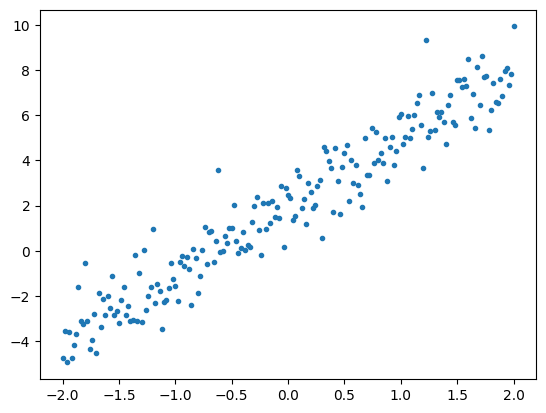

In [7]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 201
# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)
#print(x)
#define a function
def f(x):
  return x * TRUE_W + TRUE_B
# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])
# Calculate y
y = f(x) + noise
#print(y)
# Plot all the data
plt.plot(x, y, '.')
plt.show()

In [14]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
  def call(self, x):
    return self.w * x + self.b
    
keras_model = MyModelKeras()

# compile sets the training parameters
keras_model.compile(
    # By default, fit() uses tf.function().  You can
    # turn that off for debugging, but it is on now.
    run_eagerly=False,
    # Using a built-in optimizer, configuring as an object
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    # Keras comes with built-in MSE error
    # However, you could use the loss function
    # defined above
    loss=tf.keras.losses.mean_squared_error,
)
keras_model.fit(x, y, epochs=10, batch_size=1000)

Epoch 1/10
1/1 [==============================] - 0s 182ms/step - loss: 10.4297
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 6.4557
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 4.1800
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 2.8665
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 2.1021
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1.6537
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1.3884
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.2303
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 1.1352
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0777


7/7 [==============================] - 0s 772us/step


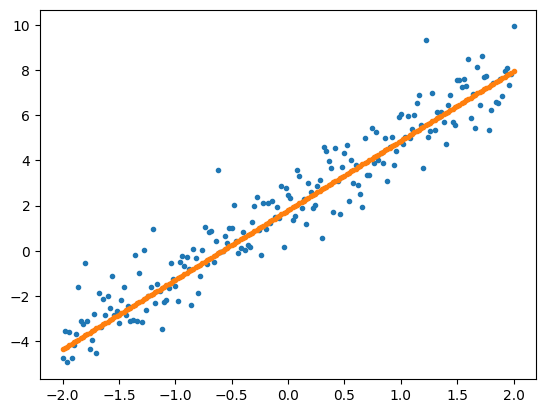

In [12]:
x_pred = x
y_pred = keras_model.predict(x_pred)
plt.plot(x, y, '.')
plt.plot(x_pred, y_pred, '.')
plt.show()


In [37]:
random_list = np.random.rand(100)
print(random_list)
print(random_list[:])

[0.7438153  0.8741557  0.69062705 0.08784208 0.38532354 0.89137799
 0.84484649 0.45831693 0.3916727  0.82332145 0.74699504 0.83306148
 0.26887865 0.14550278 0.35381467 0.18216052 0.91121386 0.36254519
 0.00200164 0.08533004 0.89992592 0.24501581 0.59268747 0.22241628
 0.68906807 0.16147049 0.5906632  0.21631081 0.10016846 0.73200172
 0.49261785 0.58411467 0.2451272  0.16137836 0.49770783 0.59756194
 0.24813419 0.51296171 0.96635506 0.35642625 0.2221779  0.05242825
 0.02784519 0.080793   0.35928145 0.50232084 0.25542549 0.98271197
 0.69673382 0.49824226 0.62592924 0.82198643 0.52397847 0.65036884
 0.83089192 0.80656116 0.72231106 0.43316792 0.24694591 0.58464826
 0.91249729 0.58391698 0.94826942 0.68889112 0.12186329 0.79482064
 0.79089177 0.43520632 0.82918798 0.65783119 0.82737337 0.5893177
 0.64637267 0.38143121 0.36638246 0.85025142 0.73858779 0.3696756
 0.81110271 0.43770837 0.93970665 0.86766615 0.0204607  0.08200798
 0.30681563 0.04575875 0.07160134 0.2980598  0.49488939 0.452471

In [56]:
SEQ_LEN = 11
print(random_list[:, -1])

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)
def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)
    #print(data)
    #print(data.shape)
    num_train = int(train_split * data.shape[0])
    #print(num_train)
    print(data[:num_train])
    X_train = data[:num_train, :-1]
    y_train = data[:num_train, -1]

    X_test = data[num_train:, :-1]
    y_test = data[num_train:, -1]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(random_list, SEQ_LEN, train_split = 0.95)
#print(X_train.shape)
#print(X_train)
print(y_train)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed